## Labarotorio 4 Inteligencia Artificial 

### Task 1.1. Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

Para iniciar con este proceso, primero se deben importar las librerías correspondientes.

In [25]:
#Importar librerias
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

Posteriormente, ya se pueden importar los datos y almacenarlos en una matriz de NumPy.

In [26]:
data = pd.read_csv('kc_house_data.csv')
data_numpy = np.array(data)

print(data_numpy)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


Finalmente, se separa las columnas a analizar, de precio y pies cuadrados, en numpy arrays para poder realizar las futuras operaciones.

In [27]:
Y = data["price"]  # price
X = data["sqft_living"]  # sqft living

# Almacenar datos en numpy array
x = np.array(X)
y = np.array(Y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Finalmente, podemos graficar los datos para entender el modelo respectivo.

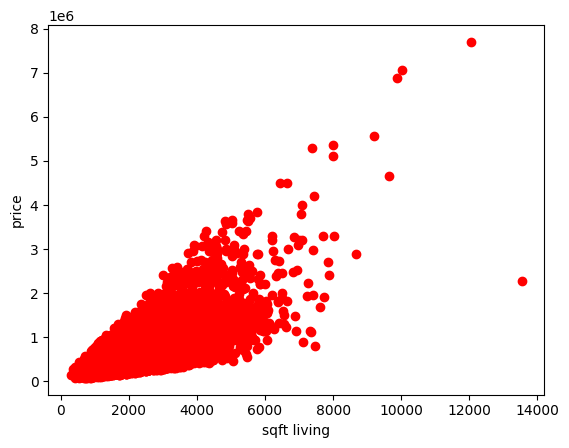

In [28]:
# Graficar datos con nombre de ejes
plt.xlabel("sqft living")
plt.ylabel("price")
plt.scatter(x, y, color="red")

### Task 1.2. Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Ahora se crearan las respectivas matrices y vectores para posteriormente poder hacer el cálculo y crear el modelo de regresión lineal. Estas matrices relacionan las variables de precio con los pies cuadrados de living space.

In [29]:
# matriz w = almacena w0, w1, ..., wn
# matriz x = almacena 1, xn^1, xn^2, ..., xn^n
# matriz X = almacena 1, x1, x1^2, ..., x1^n; 1, x2, x2^2, ..., x2^n; ...; 1, xm, xm^2, ..., xm^n
# matriz t = almacena t1, t2, ..., tm // valores reales

def matrices(grado, N):
    # Matriz de caracteristicas = X
    X_matrix = np.array([[x_train[i] ** j for j in range(0, grado+1)] for i in range(N)])
    #print("\nMatriz de Caracteristicas (Shape) (X):",X_matrix.shape)

    # Matriz de valores reales (t) = wT * X
    Y_matrix = np.array([[y_train[i]] for i in range(N)])
    #print("Matriz de Valores Reales (Shape):",Y_matrix.shape)

    # Matriz de pesos aleatorios w
    W_matrix = np.array([[random.random()] for i in range(grado+1)])
    #print("Matriz de Pesos Aleatorios (Shape):",W_matrix.shape)

    return X_matrix, Y_matrix, W_matrix

grado = 1
N = len(x_train)

X_matrix, Y_matrix, W_matrix = matrices(grado, N)

#### Ajuste de modelo polinomial dada la forma matricial
En base a las matrices anteriormente creadas, se puede calcular el valor "teórico" de los pesos w0 y w1 a través de la siguiente función. 
[B0, B1] = (X^T.X)^-1 * (X^T.Y)


>esto no era requerido, sin embargo se quería tener un punto de referencia


Matriz de Pesos (w): [[-30186.36106106]
 [   273.82181112]]


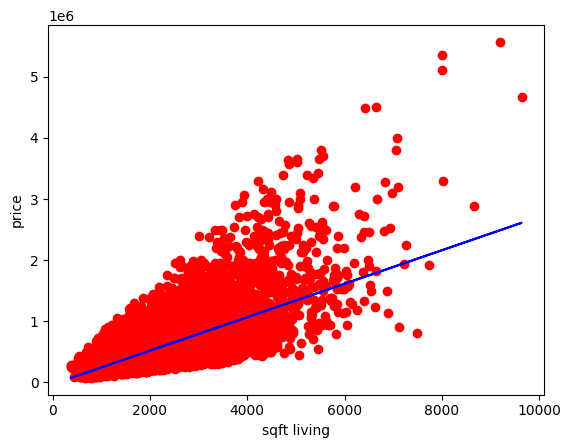

In [34]:
# En este caso, se calculó el valor teórico de w0 y w1 dado las matrices X y Y.
# Matriz w
w = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot((X_matrix.T).dot(Y_matrix))
print("\nMatriz de Pesos (w):",w)

# Graficar w0 y w1 con los datos
plt.scatter(x_train, y_train, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x_train, X_matrix.dot(w), color="blue")
plt.show()

### Task 1.3. Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).
Ya que anteriormente se creó el modelo polinomial de forma matricial (se crearon las respectivas matrices), ahora se puede implementar el descenso del grandiente para terminar el respectovo modelo.

Como primer paso, se creó un ciclo for que iba analizando el peso del vector. Posteriormente, iba calculando el error de valores predichos dado el peso del vector modificado. Con eso, calculaba la función perdida; que indicaba el gradiente. Finalmente, se iba actualizando los pesos.

In [ ]:
N = len(x_train)
grado = 1
X_matrix, Y_matrix, W_matrix = matrices(1, N)

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.000000001
num_iter = 10000

error = []

for i in range(num_iter):

    # Calcular el error (Valor real vs. Valor predicho)
    funcion_perdida = (1/N) * (((Y_matrix - X_matrix.dot(W_matrix)).T).dot(Y_matrix - X_matrix.dot(W_matrix)))
    error.append(funcion_perdida[0][0])

    # Calcular el gradiente
    gradiente = -(2/N) * (X_matrix.T).dot(Y_matrix - X_matrix.dot(W_matrix))
    
    # Actualizar los pesos
    W_matrix = W_matrix - (learning_rate * gradiente)

# Imprimir los pesos y la última pérdida
print("\nPesos obtenidos con Gradiente (W):", W_matrix)


Matriz de Caracteristicas (X): (17290, 2)

Matriz de Valores Reales (t): (17290, 1)

Matriz de Pesos Aleatorios (w): (2, 1)

Pesos obtenidos con Gradiente (W): [[  0.544745  ]
 [261.59188499]]


Como se puede observar, los pesos obtenidos son muy similares a lo que anteriormente se calculó. Así confirmando el proceso del descenso de gradiente implementado.

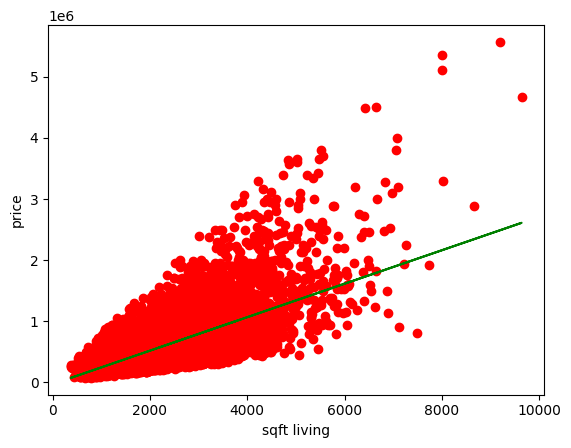

In [35]:
# Graficar w0 y w1 con los datos experimentales
plt.scatter(x_train, y_train, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x_train, X_matrix.dot(w), color="green")
plt.show()

### Task 1.4 Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Convertir X e Y a NumPy arrays
X = X.values
Y = Y.values

# Definir el número de pliegues de la validación cruzada
num_folds = 5

# Crear una lista vacía para almacenar los valores de MSE en el conjunto de prueba para cada grado de polinomio
test_mse_values = []

# Definir los grados de polinomio a probar
degrees = range(1, 15)

# Definir la función de pérdida
def loss_function(X, y, w):
    y_pred = X.dot(w)
    return np.sum((y - y_pred) ** 2) / (2 * len(y))

# Definir la función de gradiente
def gradient(X, y, w):
    y_pred = X.dot(w)
    return X.T.dot(y_pred - y) / len(y)

# Definir la función de actualización de pesos
def update_weights(X, y, w, learning_rate):
    grad = gradient(X, y, w)
    w -= learning_rate * grad
    return w

# Realizar la validación cruzada para cada grado de polinomio
for degree in degrees:
    # Crear un conjunto de características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # Normalizar los datos
    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)

    # Inicializar los pesos aleatoriamente
    np.random.seed(0)
    w = np.random.randn(X_poly.shape[1])

    # Realizar la validación cruzada
    kf = KFold(n_splits=num_folds)
    fold_mse_values = []
    for train_index, test_index in kf.split(X_poly):
        X_train_poly, X_test_poly = X_poly[train_index], X_poly[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        # Entrenar el modelo utilizando el algoritmo de descenso de gradiente
        learning_rate = 0.1
        num_iterations = 1000
        for i in range(num_iterations):
            w = update_weights(X_train_poly, y_train, w, learning_rate)
            if i % 100 == 0:
                loss_function(X_train_poly, y_train, w)

        # Calcular el MSE en el conjunto de prueba para esta iteración
        y_test_pred = X_test_poly.dot(w)
        mse_test = mean_squared_error(y_test, y_test_pred)
        fold_mse_values.append(mse_test)

    # Calcular el MSE promedio en el conjunto de prueba para este grado de polinomio
    test_mse = np.mean(fold_mse_values)
    test_mse_values.append(test_mse)

    print(f"Polynomial degree = {degree}:")
    print(f"Test MSE = {test_mse:.2f}")

#Encontrar el grado de polinomio que minimiza el MSE en el conjunto de prueba
best_degree = degrees[np.argmin(test_mse_values)]
print(f"Best degree = {best_degree}")


Polynomial degree = 1:
Test MSE = 360475031715.93
Polynomial degree = 2:
Test MSE = 356227756791.44
Polynomial degree = 3:
Test MSE = 355620588479.97
Polynomial degree = 4:
Test MSE = 355452318645.82
Polynomial degree = 5:
Test MSE = 355404570494.20
Polynomial degree = 6:
Test MSE = 355409341286.40
Polynomial degree = 7:
Test MSE = 355227708336.48
Polynomial degree = 8:
Test MSE = 354701717903.04
Polynomial degree = 9:
Test MSE = 353995292174.10
Best degree = 9


### Task 1.5. Haga un análisis sobre sus hallazgos.
Al analizar los datos del sobre la relación del tamaño y precio de una vivienda, se puede observar que estas dos variables tienen una relación lineal. 